<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment

Text(0.5, 1.0, "Median Value of Owner-Occupied Homes In Boston, MA Area (In $1,000's)")

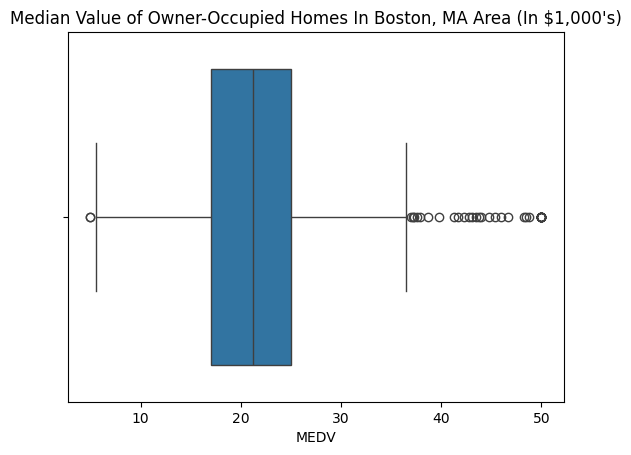

In [5]:
sns.boxplot(x = 'MEDV', data = boston_df).set_title('Median Value of Owner-Occupied Homes In Boston, MA Area (In $1,000\'s)')

The median property value of Boston, MA and the surrounding towns is about $22,000.

Text(0.5, 1.0, 'Boston, MA Properties Tractbound vs. Non-Tractbound to Charles River')

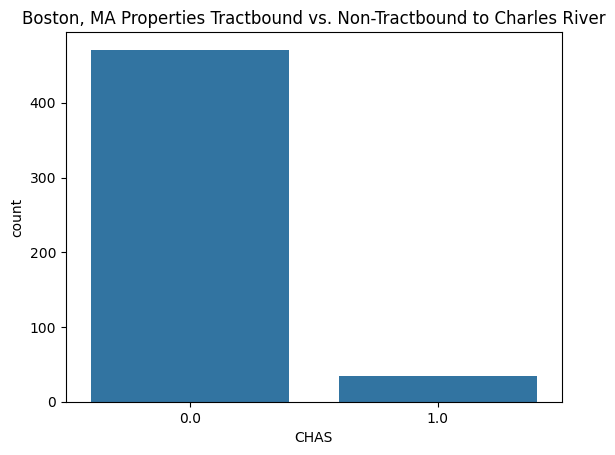

In [6]:
sns.countplot(x = 'CHAS', data = boston_df).set_title('Boston, MA Properties Tractbound vs. Non-Tractbound to Charles River')

Nearly all the properties in the area do not meet the boundries of the Charles River.

Text(0.5, 1.0, 'Median Prices for Boston, MA Area Homes By Age Group')

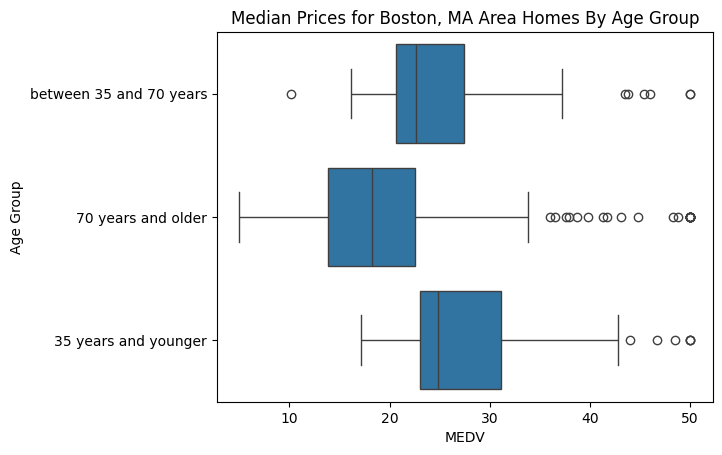

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age Group'] = '70 years and older'
sns.boxplot(x = 'MEDV', y = 'Age Group', data = boston_df).set_title('Median Prices for Boston, MA Area Homes By Age Group')

Homes that are 35 years and younger have the highest median prices while homes that are 70 years and older have the lowest median prices.

Text(0.5, 1.0, 'Nitric Oxides Concentration (Parts Per 10 Million) vs. Proportion of Non-Retail Business Acres Per Town')

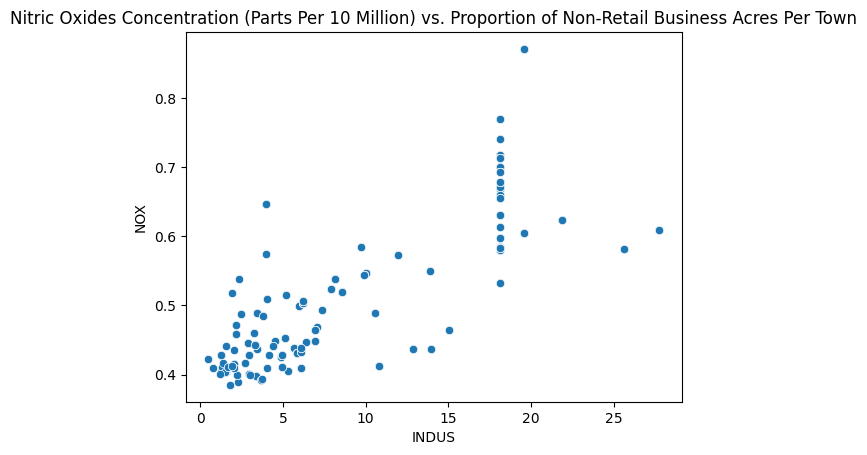

In [8]:
sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df).set_title('Nitric Oxides Concentration (Parts Per 10 Million) vs. Proportion of Non-Retail Business Acres Per Town')

Nitric oxide concentration increases with larger proportions of non-retail businesses.

Text(0.5, 1.0, 'Student-to-Teacher Ratio in Boston, MA Area Towns')

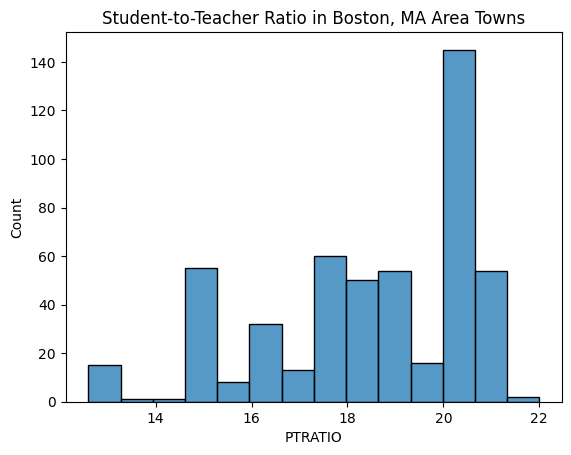

In [9]:
sns.histplot(x = 'PTRATIO', data = boston_df, stat = 'count').set_title('Student-to-Teacher Ratio in Boston, MA Area Towns')

The most common student-to-teacher ratio is about 21:1.

**Hypothesis:** There is a significant difference in the median values for houses that are bound and not bound by the Charles River.

In [10]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],boston_df[boston_df['CHAS'] == 1]['MEDV'])

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Result:** Since the t-value is less that 0.05, we reject the null hypothesis and must conclude that there is no statistical difference in median home prices for homes that are bound or not bound to the Charles River.

**Hypothesis:** There is a significant difference in median home values for each proportion of owner occupied units built before 1940.

In [11]:
thirtyFiveUnder = boston_df.loc[(boston_df['AGE'] <= 35), ['MEDV']]
thirtyFiveToSeventy = boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), ['MEDV']]
seventyPlus = boston_df.loc[(boston_df['AGE'] >= 70), ['MEDV']]
scipy.stats.f_oneway(thirtyFiveUnder, thirtyFiveToSeventy, seventyPlus)

F_onewayResult(statistic=array([36.40764999]), pvalue=array([1.7105011e-15]))

Since the p-value is less than 0.05, we reject the null hypothesis and must conclude that there is a significant difference in median home values for each proportion of owner occupied units built before 1940.

**Hypothesis:** There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per Boston, MA area towns.

In [12]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Since the p-value is less than 0.05, we reject the null hypothesis and must conclude that there is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per Boston, MA area towns.

**Hypothesis:** There is a statisically significant impact to adding an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.

In [13]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.21e-08
Time:                        14:49:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value is less than 0.05, we must reject the null hypothesis and conclude that there is a statisically significant impact to adding an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes. Correlation coefficient of 1.0916 for employment centers means that every extra employment center increases median home value by 1.0916.